In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### DATA    

In [2]:
symbol = "EURUSD=X"
start = "2022-08-27"
end = "2024-08-20"
interval = '1h'

### Variables

In [3]:
sma_short =20
sma_long=50


## Downloading Data

In [4]:
df = yf.download(symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
df.drop(columns=['Adj Close', 'Volume'], inplace=True)
df.index = df.index.tz_convert('utc')
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,returns
Datetime,,,,,
2022-08-28 23:00:00+00:00,0.995520,0.995520,0.993838,0.993838,NaN
2022-08-29 00:00:00+00:00,0.994233,0.995124,0.993246,0.993345,-0.000497
2022-08-29 01:00:00+00:00,0.993345,0.993937,0.992162,0.993443,0.000099
2022-08-29 02:00:00+00:00,0.993147,0.993937,0.992753,0.993049,-0.000397
2022-08-29 03:00:00+00:00,0.992950,0.993345,0.992457,0.992654,-0.000397
...,...,...,...,...,...
2024-08-19 18:00:00+00:00,1.108156,1.108770,1.108033,1.108525,0.000554
2024-08-19 19:00:00+00:00,1.108402,1.108893,1.108279,1.108647,0.000111
2024-08-19 20:00:00+00:00,1.108647,1.108893,1.108525,1.108893,0.000222


In [5]:
df['day_of_week'] = df.index.dayofweek
df

,Open,High,Low,Close,returns,day_of_week
Datetime,,,,,,
2022-08-28 23:00:00+00:00,0.995520,0.995520,0.993838,0.993838,NaN,6
2022-08-29 00:00:00+00:00,0.994233,0.995124,0.993246,0.993345,-0.000497,0
2022-08-29 01:00:00+00:00,0.993345,0.993937,0.992162,0.993443,0.000099,0
2022-08-29 02:00:00+00:00,0.993147,0.993937,0.992753,0.993049,-0.000397,0
2022-08-29 03:00:00+00:00,0.992950,0.993345,0.992457,0.992654,-0.000397,0
...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,1.108156,1.108770,1.108033,1.108525,0.000554,0
2024-08-19 19:00:00+00:00,1.108402,1.108893,1.108279,1.108647,0.000111,0
2024-08-19 20:00:00+00:00,1.108647,1.108893,1.108525,1.108893,0.000222,0


In [6]:
snp = yf.download('^SPX', start, end, interval=interval)
snp.index = snp.index.tz_convert('utc')
snp.index = snp.index.ceil('h')
snp['snp_volatility'] = (snp['High'] -snp['Low']) / (snp['Open']+snp['Close']+snp['Low']+snp['High'])  *  4 ## not ideal because previous day might close lower or higher
snp['snp_returns'] = np.log(snp['Close'].div(snp['Close'].shift(1)))
snp.rename(columns={"Close": "snp_price", 'Volume': 'snp_volume' }, inplace=True)
snp.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
snp

[*********************100%%**********************]  1 of 1 completed


,snp_price,snp_volume,snp_volatility,snp_returns
Datetime,,,,
2022-08-29 14:00:00+00:00,4040.330078,0,0.006902,NaN
2022-08-29 15:00:00+00:00,4027.120117,238991365,0.006495,-0.003275
2022-08-29 16:00:00+00:00,4043.340088,183154616,0.006174,0.004020
2022-08-29 17:00:00+00:00,4049.459961,169493518,0.005165,0.001512
2022-08-29 18:00:00+00:00,4045.560059,163613948,0.004866,-0.000964
...,...,...,...,...
2024-08-19 16:00:00+00:00,5579.950195,191317840,0.001935,0.000610
2024-08-19 17:00:00+00:00,5583.229980,160907370,0.001672,0.000588
2024-08-19 18:00:00+00:00,5588.919922,173170955,0.001423,0.001019


In [7]:
forex_combined = snp.join(df, how='outer')
forex_combined

,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week
Datetime,,,,,,,,,,
2022-08-28 23:00:00+00:00,NaN,NaN,NaN,NaN,0.995520,0.995520,0.993838,0.993838,NaN,6
2022-08-29 00:00:00+00:00,NaN,NaN,NaN,NaN,0.994233,0.995124,0.993246,0.993345,-0.000497,0
2022-08-29 01:00:00+00:00,NaN,NaN,NaN,NaN,0.993345,0.993937,0.992162,0.993443,0.000099,0
2022-08-29 02:00:00+00:00,NaN,NaN,NaN,NaN,0.993147,0.993937,0.992753,0.993049,-0.000397,0
2022-08-29 03:00:00+00:00,NaN,NaN,NaN,NaN,0.992950,0.993345,0.992457,0.992654,-0.000397,0
...,...,...,...,...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,5588.919922,173170955.0,0.001423,0.001019,1.108156,1.108770,1.108033,1.108525,0.000554,0
2024-08-19 19:00:00+00:00,5594.100098,215252315.0,0.001372,0.000926,1.108402,1.108893,1.108279,1.108647,0.000111,0
2024-08-19 20:00:00+00:00,5607.520020,242772673.0,0.002894,0.002396,1.108647,1.108893,1.108525,1.108893,0.000222,0


In [8]:
gold_ticker = 'GC=F'
# Fetch historical data
gold_data = yf.download(gold_ticker, start=start, end=end,  interval=interval)
gold_data.index = gold_data.index.tz_convert('utc')
gold_data.rename(columns={"Close": "gold_price", 'Volume': 'gold_volume' }, inplace=True)
gold_data.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
gold_data

[*********************100%%**********************]  1 of 1 completed


,gold_price,gold_volume
Datetime,,
2022-08-28 22:00:00+00:00,1747.099976,2303
2022-08-28 23:00:00+00:00,1746.199951,3175
2022-08-29 00:00:00+00:00,1745.800049,3193
2022-08-29 01:00:00+00:00,1735.500000,9299
2022-08-29 02:00:00+00:00,1737.900024,4304
...,...,...
2024-08-19 23:00:00+00:00,2541.800049,1335
2024-08-20 00:00:00+00:00,2543.000000,2746
2024-08-20 01:00:00+00:00,2540.000000,5307


In [9]:
forex_combined = gold_data.join(forex_combined, how='outer')

In [10]:
forex_combined

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week
Datetime,,,,,,,,,,,,
2022-08-28 22:00:00+00:00,1747.099976,2303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-28 23:00:00+00:00,1746.199951,3175.0,NaN,NaN,NaN,NaN,0.995520,0.995520,0.993838,0.993838,NaN,6.0
2022-08-29 00:00:00+00:00,1745.800049,3193.0,NaN,NaN,NaN,NaN,0.994233,0.995124,0.993246,0.993345,-0.000497,0.0
2022-08-29 01:00:00+00:00,1735.500000,9299.0,NaN,NaN,NaN,NaN,0.993345,0.993937,0.992162,0.993443,0.000099,0.0
2022-08-29 02:00:00+00:00,1737.900024,4304.0,NaN,NaN,NaN,NaN,0.993147,0.993937,0.992753,0.993049,-0.000397,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 23:00:00+00:00,2541.800049,1335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-20 00:00:00+00:00,2543.000000,2746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-20 01:00:00+00:00,2540.000000,5307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ffill_columns = ['gold_price', 'gold_volume', 'snp_returns', 'snp_volume', 'snp_price', 'snp_volatility']
forex_combined[ffill_columns] = forex_combined[ffill_columns].ffill()
forex_combined['dir'] = np.where(forex_combined['returns'] > 0, 1,0)
forex_combined

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week,dir
Datetime,,,,,,,,,,,,,
2022-08-28 22:00:00+00:00,1747.099976,2303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-08-28 23:00:00+00:00,1746.199951,3175.0,NaN,NaN,NaN,NaN,0.995520,0.995520,0.993838,0.993838,NaN,6.0,0
2022-08-29 00:00:00+00:00,1745.800049,3193.0,NaN,NaN,NaN,NaN,0.994233,0.995124,0.993246,0.993345,-0.000497,0.0,0
2022-08-29 01:00:00+00:00,1735.500000,9299.0,NaN,NaN,NaN,NaN,0.993345,0.993937,0.992162,0.993443,0.000099,0.0,1
2022-08-29 02:00:00+00:00,1737.900024,4304.0,NaN,NaN,NaN,NaN,0.993147,0.993937,0.992753,0.993049,-0.000397,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 23:00:00+00:00,2541.800049,1335.0,5607.52002,242772673.0,0.002894,0.002396,NaN,NaN,NaN,NaN,NaN,NaN,0
2024-08-20 00:00:00+00:00,2543.000000,2746.0,5607.52002,242772673.0,0.002894,0.002396,NaN,NaN,NaN,NaN,NaN,NaN,0
2024-08-20 01:00:00+00:00,2540.000000,5307.0,5607.52002,242772673.0,0.002894,0.002396,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
forex_combined.dropna(inplace=True)
forex_combined

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week,dir
Datetime,,,,,,,,,,,,,
2022-08-29 15:00:00+00:00,1753.099976,6503.0,4027.120117,238991365.0,0.006495,-0.003275,0.998702,1.000200,0.998403,0.999900,0.001299,0.0,1
2022-08-29 16:00:00+00:00,1750.599976,5476.0,4043.340088,183154616.0,0.006174,0.004020,0.999900,1.001803,0.999900,1.001703,0.001801,0.0,1
2022-08-29 17:00:00+00:00,1750.699951,6480.0,4049.459961,169493518.0,0.005165,0.001512,1.002205,1.002205,1.000901,1.001001,-0.000701,0.0,0
2022-08-29 18:00:00+00:00,1749.500000,2913.0,4045.560059,163613948.0,0.004866,-0.000964,1.001001,1.001302,0.999400,0.999400,-0.001600,0.0,0
2022-08-29 19:00:00+00:00,1750.500000,3471.0,4046.800049,190743137.0,0.004446,0.000306,0.999500,1.000300,0.999400,1.000000,0.000600,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,2542.800049,5353.0,5588.919922,173170955.0,0.001423,0.001019,1.108156,1.108770,1.108033,1.108525,0.000554,0.0,1
2024-08-19 19:00:00+00:00,2543.899902,3701.0,5594.100098,215252315.0,0.001372,0.000926,1.108402,1.108893,1.108279,1.108647,0.000111,0.0,1
2024-08-19 20:00:00+00:00,2542.600098,1749.0,5607.520020,242772673.0,0.002894,0.002396,1.108647,1.108893,1.108525,1.108893,0.000222,0.0,1


In [13]:
extra_features = ['Open', 'High', 'Low', 'Close', 'returns']
lags = 24
cols = []
features = ffill_columns + extra_features
features

['gold_price',
 'gold_volume',
 'snp_returns',
 'snp_volume',
 'snp_price',
 'snp_volatility',
 'Open',
 'High',
 'Low',
 'Close',
 'returns']

In [14]:
for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag_{}".format(f, lag)
        forex_combined[col] = forex_combined[f].shift(lag)
        cols.append(col)
forex_combined.dropna(inplace=True)
forex_combined

C:\Users\grigo\AppData\Local\Temp\ipykernel_6176\1825698716.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forex_combined[col] = forex_combined[f].shift(lag)
C:\Users\grigo\AppData\Local\Temp\ipykernel_6176\1825698716.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forex_combined[col] = forex_combined[f].shift(lag)
C:\Users\grigo\AppData\Local\Temp\ipykernel_6176\1825698716.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-08-30 15:00:00+00:00,1737.800049,10693.0,3991.939941,303972709.0,0.009543,-0.003466,0.999400,1.003512,0.999400,1.002104,...,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600,-0.000701,0.001801,0.001299
2022-08-30 16:00:00+00:00,1735.800049,5181.0,3991.959961,197123531.0,0.004345,0.000005,1.002305,1.003512,1.002004,1.002707,...,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600,-0.000701,0.001801
2022-08-30 17:00:00+00:00,1735.800049,6423.0,3975.770020,186525504.0,0.005411,-0.004064,1.002908,1.002908,1.001402,1.002004,...,0.000000,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600,-0.000701
2022-08-30 18:00:00+00:00,1735.699951,2296.0,3975.189941,193156989.0,0.004888,-0.000146,1.002004,1.003210,1.001904,1.002406,...,0.000800,0.000000,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600
2022-08-30 19:00:00+00:00,1734.900024,3164.0,3989.540039,224540573.0,0.006125,0.003603,1.002406,1.003512,1.001803,1.002004,...,0.000100,0.000800,0.000000,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,2542.800049,5353.0,5588.919922,173170955.0,0.001423,0.001019,1.108156,1.108770,1.108033,1.108525,...,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331,0.000771,0.000771
2024-08-19 19:00:00+00:00,2543.899902,3701.0,5594.100098,215252315.0,0.001372,0.000926,1.108402,1.108893,1.108279,1.108647,...,0.000000,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331,0.000771
2024-08-19 20:00:00+00:00,2542.600098,1749.0,5607.520020,242772673.0,0.002894,0.002396,1.108647,1.108893,1.108525,1.108893,...,0.000773,0.000000,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331


In [15]:
split = int(len(forex_combined)* 0.7)
train = forex_combined.iloc[:split].copy()
train

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-08-30 15:00:00+00:00,1737.800049,10693.0,3991.939941,303972709.0,0.009543,-0.003466,0.999400,1.003512,0.999400,1.002104,...,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600,-0.000701,0.001801,0.001299
2022-08-30 16:00:00+00:00,1735.800049,5181.0,3991.959961,197123531.0,0.004345,0.000005,1.002305,1.003512,1.002004,1.002707,...,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600,-0.000701,0.001801
2022-08-30 17:00:00+00:00,1735.800049,6423.0,3975.770020,186525504.0,0.005411,-0.004064,1.002908,1.002908,1.001402,1.002004,...,0.000000,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600,-0.000701
2022-08-30 18:00:00+00:00,1735.699951,2296.0,3975.189941,193156989.0,0.004888,-0.000146,1.002004,1.003210,1.001904,1.002406,...,0.000800,0.000000,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600,-0.001600
2022-08-30 19:00:00+00:00,1734.900024,3164.0,3989.540039,224540573.0,0.006125,0.003603,1.002406,1.003512,1.001803,1.002004,...,0.000100,0.000800,0.000000,-0.001600,-0.000400,0.001001,0.000000,0.000100,0.000200,0.000600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16 19:00:00+00:00,2032.800049,4989.0,4752.200195,215168361.0,0.004323,-0.002912,1.087311,1.087784,1.087075,1.087666,...,-0.000109,-0.000437,-0.000328,0.000656,-0.002296,-0.000438,-0.000109,-0.000110,0.000110,-0.000110
2024-01-16 20:00:00+00:00,2031.800049,2850.0,4756.799805,242464900.0,0.002288,0.000967,1.087666,1.087903,1.087311,1.087548,...,-0.000218,-0.000109,-0.000437,-0.000328,0.000656,-0.002296,-0.000438,-0.000109,-0.000110,0.000110
2024-01-16 21:00:00+00:00,2031.699951,0.0,4765.180176,336315998.0,0.002521,0.001760,1.087548,1.088021,1.087429,1.087784,...,0.000328,-0.000218,-0.000109,-0.000437,-0.000328,0.000656,-0.002296,-0.000438,-0.000109,-0.000110


In [16]:
test = forex_combined.iloc[split:].copy()
test

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-17 00:00:00+00:00,2031.599976,2532.0,4765.180176,336315998.0,0.002521,0.001760,1.088139,1.088139,1.087548,1.088139,...,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437,-0.000328,0.000656,-0.002296
2024-01-17 01:00:00+00:00,2033.400024,4852.0,4765.180176,336315998.0,0.002521,0.001760,1.088139,1.088376,1.087666,1.088021,...,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437,-0.000328,0.000656
2024-01-17 02:00:00+00:00,2032.000000,5865.0,4765.180176,336315998.0,0.002521,0.001760,1.088021,1.088732,1.087666,1.087784,...,0.000980,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437,-0.000328
2024-01-17 03:00:00+00:00,2027.199951,4409.0,4765.180176,336315998.0,0.002521,0.001760,1.087666,1.087784,1.086838,1.086957,...,-0.000545,0.000980,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437
2024-01-17 04:00:00+00:00,2028.500000,2729.0,4765.180176,336315998.0,0.002521,0.001760,1.086838,1.087429,1.086838,1.087311,...,-0.001197,-0.000545,0.000980,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,2542.800049,5353.0,5588.919922,173170955.0,0.001423,0.001019,1.108156,1.108770,1.108033,1.108525,...,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331,0.000771,0.000771
2024-08-19 19:00:00+00:00,2543.899902,3701.0,5594.100098,215252315.0,0.001372,0.000926,1.108402,1.108893,1.108279,1.108647,...,0.000000,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331,0.000771
2024-08-19 20:00:00+00:00,2542.600098,1749.0,5607.520020,242772673.0,0.002894,0.002396,1.108647,1.108893,1.108525,1.108893,...,0.000773,0.000000,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331


In [17]:
mu, std = train.mean(), train.std()

In [18]:
train_standardized = (train-mu) / std

In [19]:
train_standardized

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-08-30 15:00:00+00:00,-1.390359,0.377020,-0.680478,0.005995,2.723099,-1.203663,-1.805296,-1.720132,-1.779931,-1.731903,...,-0.352815,0.851402,-0.008841,0.077130,0.163062,0.506624,-1.384195,-0.611203,1.539181,1.107184
2022-08-30 16:00:00+00:00,-1.407350,-0.266903,-0.680409,-0.894752,0.391589,-0.009288,-1.725986,-1.720132,-1.709102,-1.715443,...,-1.383947,-0.353044,0.851392,-0.008818,0.077088,0.162988,0.506688,-1.384134,-0.611245,1.539063
2022-08-30 17:00:00+00:00,-1.407350,-0.121810,-0.735621,-0.984094,0.869719,-1.409390,-1.709517,-1.736682,-1.725482,-1.734644,...,-0.008608,-1.384197,-0.353055,0.851418,-0.008860,0.077016,0.163089,0.506717,-1.384083,-0.611703
2022-08-30 18:00:00+00:00,-1.408200,-0.603934,-0.737599,-0.928190,0.635038,-0.061222,-1.734210,-1.728408,-1.711833,-1.723674,...,0.678824,-0.008830,-1.384209,-0.353034,0.851377,-0.008931,0.077125,0.163123,0.506541,-1.384664
2022-08-30 19:00:00+00:00,-1.414996,-0.502532,-0.688662,-0.663624,1.189899,1.228917,-1.723242,-1.720132,-1.714563,-1.734644,...,0.077347,0.678617,-0.008841,-1.384192,-0.353076,0.851293,-0.008813,0.077161,0.162988,0.506259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16 19:00:00+00:00,1.115798,-0.289333,1.912170,-0.742633,0.381743,-1.013122,0.594868,0.589711,0.605115,0.604304,...,-0.102523,-0.384395,-0.290688,0.554691,-1.982756,-0.385462,-0.102910,-0.102954,0.085278,-0.103435
2024-01-16 20:00:00+00:00,1.107303,-0.539215,1.927855,-0.512521,-0.530956,0.321875,0.604557,0.592955,0.611545,0.601072,...,-0.196281,-0.102746,-0.384406,-0.290666,0.554649,-1.982799,-0.385305,-0.102871,-0.103057,0.084930
2024-01-16 21:00:00+00:00,1.106452,-0.872157,1.956434,0.278652,-0.426632,0.594675,0.601325,0.596200,0.614762,0.607533,...,0.272980,-0.196507,-0.102758,-0.384385,-0.290709,0.554570,-1.982477,-0.385261,-0.102974,-0.103435


In [20]:
train_standardized.describe()

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
count,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,...,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03,8.544000e+03
mean,3.326511e-16,-4.989766e-17,-8.515868e-16,1.097749e-16,2.328558e-17,-2.328558e-17,-1.543501e-15,-2.355170e-15,2.428353e-15,2.860799e-16,...,-1.122697e-17,-8.316277e-19,2.079069e-18,2.494883e-18,1.663255e-18,-6.237208e-19,4.989766e-18,-5.613487e-18,4.158139e-19,-9.355812e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.388574e+00,-8.721570e-01,-2.252687e+00,-2.556520e+00,-1.296278e+00,-9.669546e+00,-3.024487e+00,-3.011762e+00,-3.012056e+00,-3.037459e+00,...,-1.200014e+01,-1.200062e+01,-1.200063e+01,-1.200066e+01,-1.200071e+01,-1.200061e+01,-1.199925e+01,-1.199901e+01,-1.199768e+01,-1.199994e+01
25%,-6.538043e-01,-5.919013e-01,-7.651186e-01,-4.081163e-01,-6.475696e-01,-4.139266e-01,-2.548273e-01,-2.579295e-01,-2.509985e-01,-2.551464e-01,...,-3.854174e-01,-3.856387e-01,-3.856499e-01,-3.856286e-01,-3.856709e-01,-3.857367e-01,-3.855880e-01,-3.855542e-01,-3.856230e-01,-3.860354e-01
50%,3.274200e-01,-3.490285e-01,-1.827236e-01,7.146359e-03,-2.587220e-01,1.767115e-02,2.282563e-01,2.276699e-01,2.305846e-01,2.279746e-01,...,-8.607894e-03,-8.829530e-03,-8.840528e-03,-8.817664e-03,-8.859759e-03,-8.930964e-03,-8.813015e-03,-8.775341e-03,-8.889533e-03,-9.252614e-03
75%,7.190599e-01,1.521083e-01,8.410904e-01,3.241067e-01,3.892928e-01,4.528527e-01,7.115255e-01,7.101979e-01,7.115824e-01,7.112811e-01,...,3.723860e-01,3.723056e-01,3.722948e-01,3.723192e-01,3.722774e-01,3.726822e-01,3.727607e-01,3.727919e-01,3.726317e-01,3.727810e-01
max,1.819222e+00,9.515998e+00,2.047486e+00,1.609350e+01,1.263305e+01,1.401245e+01,1.651148e+00,1.685896e+00,1.646766e+00,1.654439e+00,...,1.500463e+01,1.500473e+01,1.500473e+01,1.500481e+01,1.500478e+01,1.500449e+01,1.500305e+01,1.500284e+01,1.500091e+01,1.500292e+01


In [21]:
from DNNModel import *

In [22]:
set_seeds(100)

model = create_model(hl=3, hu=50, dropout= True, input_dim=len(cols))
model.fit(x=train_standardized[cols], y=train['dir'], epochs=50, verbose=True,
          validation_split=0.2, shuffle=False, class_weight=cw(train))

Epoch 1/50


C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5150 - loss: 0.7380 - val_accuracy: 0.5354 - val_loss: 0.6911
Epoch 2/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4972 - loss: 0.7178 - val_accuracy: 0.5354 - val_loss: 0.6908
Epoch 3/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5046 - loss: 0.7099 - val_accuracy: 0.5372 - val_loss: 0.6914
Epoch 4/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5003 - loss: 0.7067 - val_accuracy: 0.5366 - val_loss: 0.6913
Epoch 5/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 0.7031 - val_accuracy: 0.5366 - val_loss: 0.6917
Epoch 6/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5089 - loss: 0.7015 - val_accuracy: 0.5377 - val_loss: 0.6917
Epoch 7/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5069 - loss: 0.7010 - val_accuracy: 0.5266 - val_loss: 0.6915
Epoch 8/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5059 - loss: 0.7009 - val_accuracy: 0.5319 - val_

In [23]:
model.evaluate(train_standardized[cols], train['dir'])

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5905 - loss: 0.6785


[0.682673454284668, 0.5775983333587646]

In [24]:
predict = model.predict(train_standardized[cols])
predict

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


array([[0.5363864 ],
       [0.50734246],
       [0.49099603],
       ...,
       [0.5501518 ],
       [0.5044123 ],
       [0.48607168]], dtype=float32)

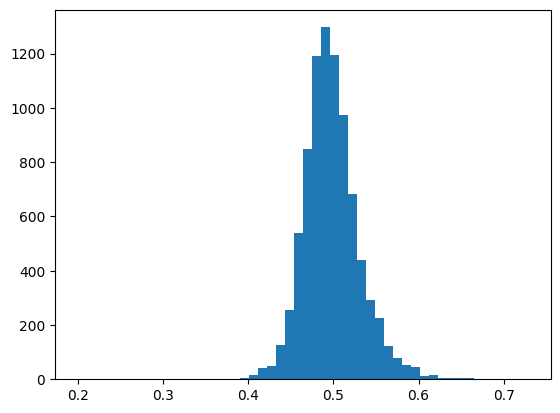

In [25]:
plt.hist(predict, bins=50)
plt.show()

In [26]:
test

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-17 00:00:00+00:00,2031.599976,2532.0,4765.180176,336315998.0,0.002521,0.001760,1.088139,1.088139,1.087548,1.088139,...,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437,-0.000328,0.000656,-0.002296
2024-01-17 01:00:00+00:00,2033.400024,4852.0,4765.180176,336315998.0,0.002521,0.001760,1.088139,1.088376,1.087666,1.088021,...,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437,-0.000328,0.000656
2024-01-17 02:00:00+00:00,2032.000000,5865.0,4765.180176,336315998.0,0.002521,0.001760,1.088021,1.088732,1.087666,1.087784,...,0.000980,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437,-0.000328
2024-01-17 03:00:00+00:00,2027.199951,4409.0,4765.180176,336315998.0,0.002521,0.001760,1.087666,1.087784,1.086838,1.086957,...,-0.000545,0.000980,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109,-0.000437
2024-01-17 04:00:00+00:00,2028.500000,2729.0,4765.180176,336315998.0,0.002521,0.001760,1.086838,1.087429,1.086838,1.087311,...,-0.001197,-0.000545,0.000980,-0.000544,-0.001635,-0.001200,-0.000109,0.000328,-0.000218,-0.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,2542.800049,5353.0,5588.919922,173170955.0,0.001423,0.001019,1.108156,1.108770,1.108033,1.108525,...,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331,0.000771,0.000771
2024-08-19 19:00:00+00:00,2543.899902,3701.0,5594.100098,215252315.0,0.001372,0.000926,1.108402,1.108893,1.108279,1.108647,...,0.000000,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331,0.000771
2024-08-19 20:00:00+00:00,2542.600098,1749.0,5607.520020,242772673.0,0.002894,0.002396,1.108647,1.108893,1.108525,1.108893,...,0.000773,0.000000,0.000773,-0.000110,0.000000,0.000662,-0.000331,0.000110,0.000221,0.000331


In [27]:
test_standardized = (test-mu) / std
test_standardized

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-17 00:00:00+00:00,1.105603,-0.576364,1.956434,0.278652,-0.426632,0.594675,0.617481,0.599444,0.617979,0.617230,...,-1.413768,-1.040715,-0.102758,0.272778,-0.196538,-0.102847,-0.384336,-0.290586,0.554476,-1.982957
2024-01-17 01:00:00+00:00,1.120895,-0.305337,1.956434,0.278652,-0.426632,0.594675,0.617481,0.605937,0.621199,0.613997,...,-0.476470,-1.414019,-1.040727,-0.102735,0.272736,-0.196606,-0.102719,-0.384292,-0.290667,0.554202
2024-01-17 02:00:00+00:00,1.109001,-0.186997,1.956434,0.278652,-0.426632,0.594675,0.614249,0.615680,0.621199,0.607533,...,0.833662,-0.476701,-1.414031,-1.040708,-0.102777,0.272660,-0.196469,-0.102680,-0.384361,-0.291074
2024-01-17 03:00:00+00:00,1.068223,-0.357089,1.956434,0.278652,-0.426632,0.594675,0.604557,0.589711,0.598687,0.584934,...,-0.476643,0.833458,-0.476713,-1.414014,-1.040751,-0.102847,0.272749,-0.196428,-0.102783,-0.384783
2024-01-17 04:00:00+00:00,1.079267,-0.553350,1.956434,0.278652,-0.426632,0.594675,0.581963,0.579983,0.598687,0.594614,...,-1.037486,-0.476874,0.833447,-0.476692,-1.414057,-1.040807,-0.102719,0.272782,-0.196520,-0.103161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 18:00:00+00:00,5.448477,-0.246809,4.765560,-1.096674,-0.918821,0.339483,1.163983,1.164930,1.175263,1.173837,...,0.655571,-0.103732,-0.008841,0.560109,-0.293231,0.085817,0.180787,0.275559,0.654006,0.653235
2024-08-19 19:00:00+00:00,5.457820,-0.439799,4.783225,-0.741925,-0.941987,0.307772,1.170690,1.168302,1.181944,1.177193,...,-0.008608,0.655363,-0.103743,-0.008818,0.560067,-0.293298,0.085925,0.180821,0.275410,0.653748
2024-08-19 20:00:00+00:00,5.446778,-0.667835,4.828990,-0.509926,-0.258942,0.813471,1.177402,1.168302,1.188627,1.183908,...,0.655986,-0.008830,0.655353,-0.103721,-0.008860,0.559988,-0.293151,0.085961,0.180684,0.275092


In [28]:
test_standardized.describe()

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_15,returns_lag_16,returns_lag_17,returns_lag_18,returns_lag_19,returns_lag_20,returns_lag_21,returns_lag_22,returns_lag_23,returns_lag_24
count,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,...,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,3.200951,0.120640,3.543728,0.000627,-0.257474,0.009429,0.450739,0.444085,0.456196,0.450728,...,-0.005646,-0.006175,-0.006082,-0.006164,-0.006257,-0.006535,-0.006494,-0.006534,-0.006649,-0.007473
std,1.284181,1.093883,0.728563,0.664022,0.797679,0.909800,0.225644,0.226104,0.225226,0.226020,...,0.608214,0.608466,0.608417,0.608338,0.608347,0.608242,0.608209,0.608217,0.608142,0.609096
min,0.836298,-0.872157,1.812557,-2.556520,-1.214839,-11.958683,-0.114042,-0.128773,-0.119296,-0.117427,...,-6.198638,-6.198990,-6.199004,-6.199006,-6.199053,-6.199035,-6.198276,-6.198134,-6.197501,-6.198844
25%,2.210436,-0.537462,2.993922,-0.252510,-0.768557,-0.349484,0.281881,0.281573,0.287102,0.284760,...,-0.285327,-0.285590,-0.285566,-0.285544,-0.285586,-0.285653,-0.285543,-0.285584,-0.285665,-0.286072
50%,3.698414,-0.249964,3.504260,0.002684,-0.426632,0.047264,0.475919,0.466975,0.483460,0.475656,...,-0.008608,-0.008830,-0.008841,-0.008818,-0.008860,-0.008931,-0.008813,-0.008775,-0.008890,-0.009253
75%,4.078160,0.320595,4.218084,0.221289,-0.063816,0.449283,0.602941,0.596200,0.605115,0.604304,...,0.269055,0.268839,0.268828,0.268852,0.268810,0.268735,0.268824,0.268857,0.268709,0.268390
max,5.479909,12.299163,5.033739,5.022257,7.468390,6.029409,1.187472,1.175042,1.191971,1.183908,...,5.096859,5.096744,5.096736,5.096780,5.096741,5.096596,5.096186,5.096137,5.095407,5.095852


In [29]:
model.evaluate(test_standardized[cols], test['dir'])

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.4692 - loss: 0.7019


[0.7091071009635925, 0.4641004502773285]

In [30]:
pred = model.predict(test_standardized[cols])
pred

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


array([[0.5185485 ],
       [0.52787507],
       [0.5073915 ],
       ...,
       [0.5426675 ],
       [0.54983366],
       [0.5511843 ]], dtype=float32)

In [31]:
test['probability'] = model.predict(test_standardized[cols])

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


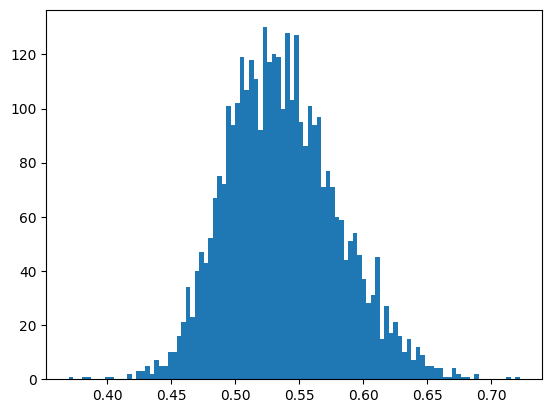

In [32]:
plt.hist(test['probability'], bins=100)
plt.show()

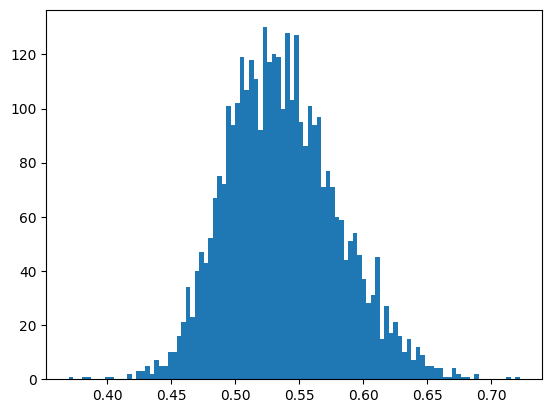

In [33]:
plt.hist(pred, bins=100)
plt.show()

In [34]:
threshold = 0.55

In [35]:
test['position'] = np.where(test.probability < (1-threshold), -1, np.nan)
test['position'] = np.where(test.probability > threshold, 1, test.position)

In [37]:
#test.index = test.index.tz_localize('utc')
test['NYTime'] = test.index.tz_convert("America/New_York")
test['hour'] = test.NYTime.dt.hour

In [38]:
test['position'] = np.where(~test.hour.between(2,12), 0, test.position)

In [39]:
test.position.value_counts(dropna=False)

position
 0.0    1969
 NaN    1042
 1.0     639
-1.0      13
Name: count, dtype: int64

In [40]:
test['position'] = test.position.ffill()

In [41]:
test.position.value_counts(dropna=False)

position
 0.0    2350
 1.0    1279
-1.0      34
Name: count, dtype: int64

In [42]:
test['strategy'] = test['position'] * test['returns']

In [43]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)

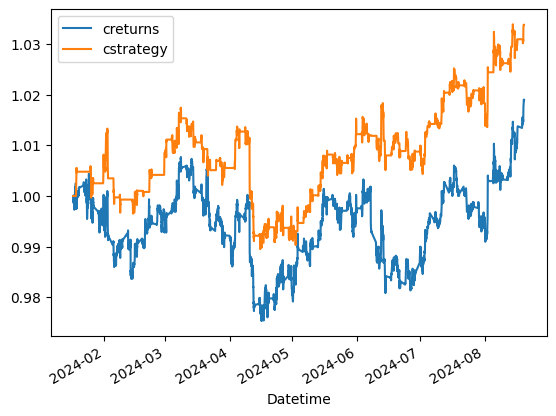

In [44]:
test[['creturns', 'cstrategy']].plot()
plt.show()

In [46]:
ptc = 0.000059

In [47]:
test['trades'] = test.position.diff().abs()
test.trades.value_counts()

trades
0.0    3389
1.0     264
2.0       9
Name: count, dtype: int64

In [48]:
test['strategy_net'] = test.strategy - test.trades * ptc

In [49]:
test['cstrategy_net'] = test['strategy_net'].cumsum().apply(np.exp)

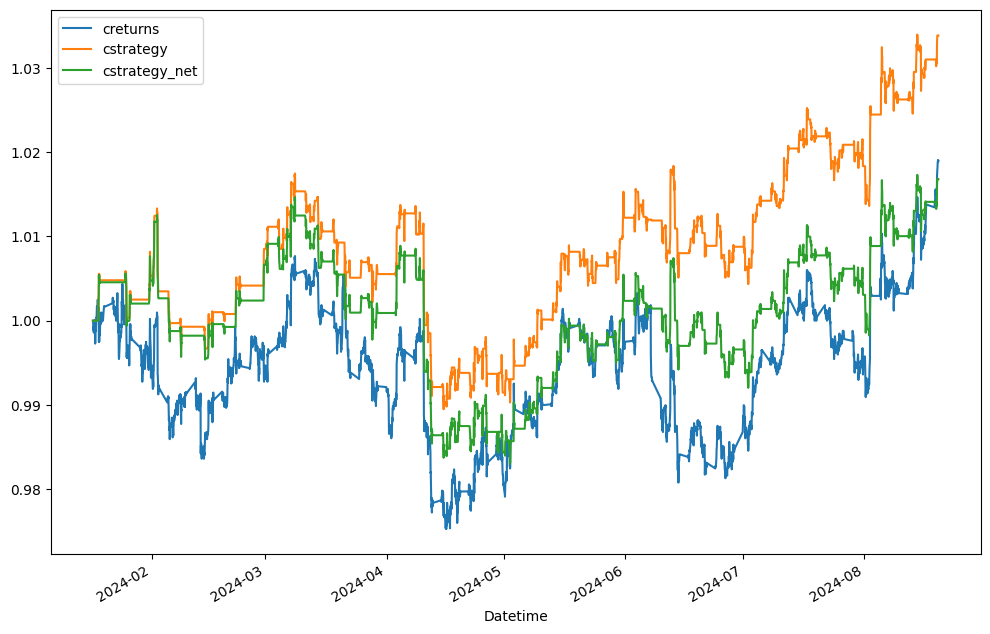

In [50]:
test[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize=(12, 8))
plt.show()

In [54]:
model.save('DNN_modelv2.keras')

In [55]:
import pickle

In [56]:
params = {'mu': mu, 'std': std}

In [57]:
pickle.dump(params, open('paramsv2.pkl', 'wb'))

In [59]:
test[['strategy_net']].mean() * 252

strategy_net    0.001146
dtype: float64